In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [2]:
# Set random seed
np.random.seed(24)

In [3]:
# Amir deals dataset
amir_deals = pd.read_csv('https://assets.datacamp.com/production/repositories/5786/datasets/db3f4e8c9d708fc3b8dfea51d0fdf21d693d2be3/amir_deals.csv')

In [4]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


In [5]:
# Calculate probability of picking a deal with each product
probs = counts/amir_deals.shape[0]
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


In [6]:
# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace=False)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [7]:
# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


In [8]:
# Restaurants dataframe
restaurant_groups = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTOZd1ME-yR1IzYZdUL1yLnsfd-o5qRRapjClZuuh3z3clXzmu5i7e01CE3mrqgDHZTyJC-chEXc7HN/pub?gid=1180898266&single=true&output=csv')

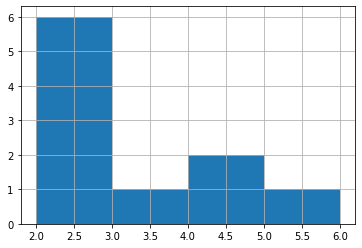

In [9]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()

In [10]:
# Create probability distribution
size_dist = restaurant_groups.group_id.value_counts()/restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

  group_size  prob
0          A   0.1
1          B   0.1
2          C   0.1
3          D   0.1
4          E   0.1
5          F   0.1
6          G   0.1
7          H   0.1
8          I   0.1
9          J   0.1


In [11]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Calculate expected value
expected_value = np.sum(size_dist.group_size * size_dist.prob)
print(expected_value)

2.9000000000000004


In [12]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

0.30000000000000004


In [15]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

0.16666666666666666


In [16]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = uniform.cdf(30, min_time, max_time) - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

0.8333333333333334


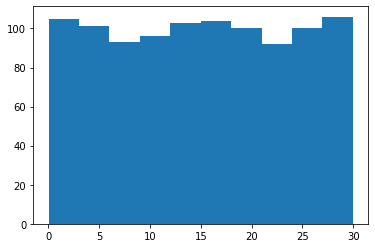

In [17]:
# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()